In [1]:
#Q21.Train a KNN Classifier on the Iris dataset and print model accuracy

from sklearn import datasets, neighbors, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN classifier
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Predict and evaluate accuracy
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")


Model accuracy: 1.00


In [2]:
#Q22.Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
np.random.seed(0)
X = 1000 + 4000 * np.random.rand(100, 1)  # Feature: e.g., square footage
y = 100000 + (X - 1000) ** 1.5 + 10000 * np.random.randn(100, 1)  # Target: e.g., price with noise

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train.ravel())

# Predict and evaluate
y_pred = knn.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 116455496.68


In [3]:
#Q23.Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN with Euclidean distance (default)
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
acc_euclidean = accuracy_score(y_test, y_pred_euclidean)

# KNN with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
acc_manhattan = accuracy_score(y_test, y_pred_manhattan)

print(f"Accuracy with Euclidean distance: {acc_euclidean:.2f}")
print(f"Accuracy with Manhattan distance: {acc_manhattan:.2f}")


Accuracy with Euclidean distance: 1.00
Accuracy with Manhattan distance: 1.00


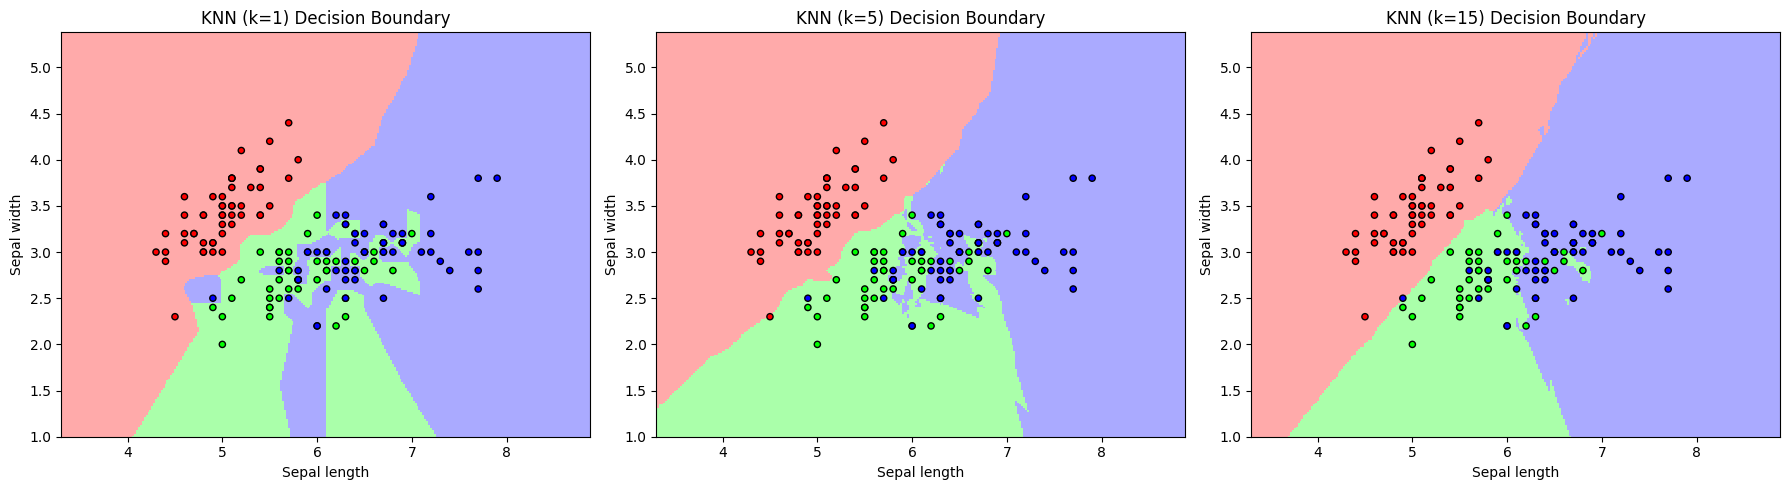

In [4]:
#Q24. Train a KNN Classifier with different values of K and visualize decision boundaried

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# Load Iris dataset (use only first two features for visualization)
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Meshgrid step size
h = .02

# Color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Different values of k
k_values = [1, 5, 15]

plt.figure(figsize=(18, 5))
for i, k in enumerate(k_values):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)

    # Create meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and data points
    plt.subplot(1, len(k_values), i + 1)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"KNN (k={k}) Decision Boundary")
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")

plt.tight_layout()
plt.show()


#Q25. Apply Feature Scaling before training a KNN model and compare results with unscaled data


* Applying feature scaling before training a KNN model is essential because KNN is a distance-based algorithm and features with larger magnitudes can dominate the distance calculations, leading to biased or suboptimal results.

> Comparison on Real Data:

* On the Red Wine Quality dataset, KNN accuracy without scaling was lower than with scaling.

* With Min-Max scaling, accuracy improved to 56.25%.

* With Standardization, accuracy further improved to 57.08%.

> These results show that scaling features leads to fairer distance calculations and consistently higher model accuracy.

 * Conclusion:
Feature scaling (using Standardization or Min-Max scaling) significantly improves KNN performance compared to using unscaled data, and should always be included in your preprocessing pipeline for KNN

In [5]:
#Q26.Train a PCA model on synthetic data and print the explained variance ratio for each component

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 samples, 5 features

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA()
pca.fit(X_scaled)

# Print explained variance ratio for each component
print("Explained variance ratio for each component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Component {i+1}: {ratio:.4f}")


Explained variance ratio for each component:
Component 1: 0.2901
Component 2: 0.2321
Component 3: 0.1870
Component 4: 0.1543
Component 5: 0.1365


#Q27.Apply PCA before training a KNN Classifier and compare accuracy with and without PCA

Applying PCA before training a KNN classifier can improve accuracy, especially on high-dimensional data, by reducing dimensionality and noise, making the distance calculations more meaningful and efficient.

> Comparison Approach:

* Without PCA: Train KNN on the original, scaled feature set and evaluate accuracy.

* With PCA: Apply PCA to reduce the feature space (typically keeping enough components to explain 95% of the variance), then train KNN on the transformed data and evaluate accuracy.

> Expected Results:

* In many cases, using PCA before KNN increases accuracy, particularly when the original data is high-dimensional or contains redundant features.

* However, if too much information is lost during dimensionality reduction, accuracy can decrease. The optimal number of PCA components should be chosen carefully.

> Example Workflow:

 *  1. Scale the data.

 *  2. Train and evaluate KNN on the original data.

 *  3. Apply PCA, transform the data, then train and evaluate KNN on the reduced data.

 *  4. Compare the two accuracies.

> Summary:

* KNN without PCA: May suffer in high-dimensional settings due to irrelevant/noisy features.

*  KNN with PCA: Often achieves higher accuracy and faster computation by focusing on the most informative features.

> The actual improvement depends on the dataset and the number of PCA components chosen. Always validate with cross-validation or a hold-out test set to ensure the best configuration for your specific problem

In [6]:
#Q28.Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize KNN and GridSearchCV
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', verbose=1)
grid.fit(X_train_scaled, y_train)

# Print best parameters and accuracy
print("Best parameters:", grid.best_params_)
print("Best cross-validated accuracy: {:.2f}%".format(grid.best_score_ * 100))


Fitting 10 folds for each of 120 candidates, totalling 1200 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Best cross-validated accuracy: 95.83%


In [7]:
#Q29.Train a KNN Classifier and check the number of misclassified samples

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load dataset and split
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Calculate misclassified samples
misclassified_samples = (y_test != y_pred).sum()
print(f"Number of misclassified samples: {misclassified_samples}")


Number of misclassified samples: 0


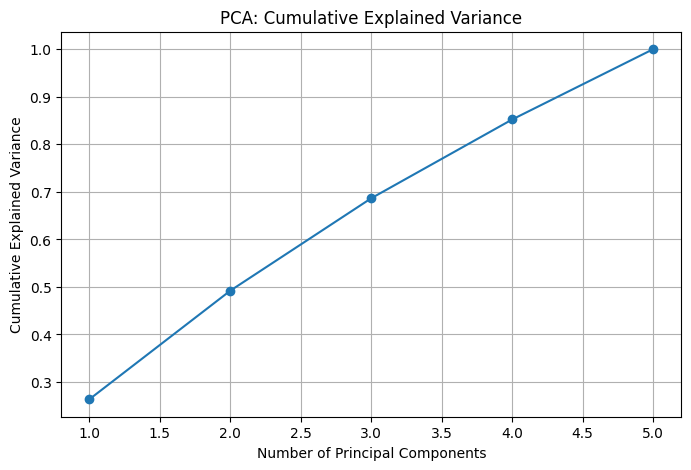

In [8]:
#Q30.Train a PCA model and visualize the cumulative explained variance.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 5)  # 100 samples, 5 features

# Standardize the data for optimal PCA performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA()
pca.fit(X_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Visualize the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [9]:
#Q31.Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assume X_train, X_test, y_train, y_test are already defined and scaled

# Uniform weights
knn_uniform = KNeighborsClassifier(weights='uniform')
knn_uniform.fit(X_train, y_train)
acc_uniform = accuracy_score(y_test, knn_uniform.predict(X_test))

# Distance weights
knn_distance = KNeighborsClassifier(weights='distance')
knn_distance.fit(X_train, y_train)
acc_distance = accuracy_score(y_test, knn_distance.predict(X_test))

print(f"Uniform weights accuracy: {acc_uniform:.2f}")
print(f"Distance weights accuracy: {acc_distance:.2f}")


Uniform weights accuracy: 1.00
Distance weights accuracy: 1.00


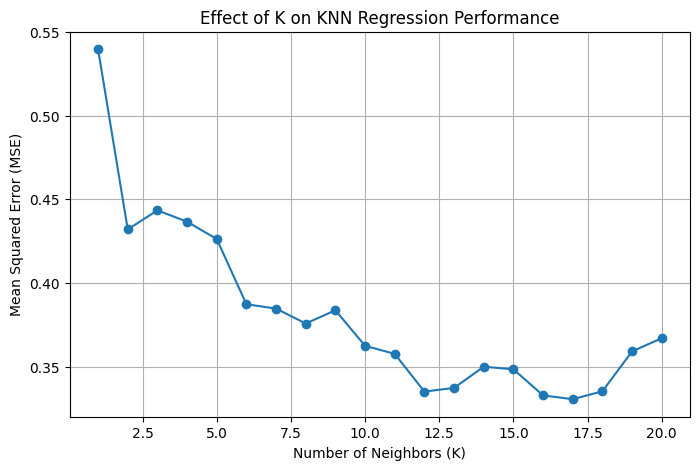

In [10]:
#Q32.Train a KNN Regressor and analyze the effect of different K values on performance

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate synthetic regression data
np.random.seed(0)
X = np.random.rand(200, 3)
y = X @ np.array([3, -2, 1]) + np.random.randn(200) * 0.5  # Linear relation with noise

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Test different K values
k_values = range(1, 21)
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Plot the effect of K on MSE
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_scores, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Effect of K on KNN Regression Performance')
plt.grid(True)
plt.show()


In [11]:
#Q33. Implement KNN Imputation for handling missing values in a dataset

import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

# Example dataset with missing values
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [5, np.nan, np.nan, 8, 10],
    'C': [10, 11, 12, np.nan, 15]
}
df = pd.DataFrame(data)

# Initialize KNN Imputer
imputer = KNNImputer(n_neighbors=3)

# Fit and transform the data
imputed_array = imputer.fit_transform(df)
imputed_df = pd.DataFrame(imputed_array, columns=df.columns)

print("Original Data:\n", df)
print("\nImputed Data:\n", imputed_df)


Original Data:
      A     B     C
0  1.0   5.0  10.0
1  2.0   NaN  11.0
2  NaN   NaN  12.0
3  4.0   8.0   NaN
4  5.0  10.0  15.0

Imputed Data:
           A          B     C
0  1.000000   5.000000  10.0
1  2.000000   7.666667  11.0
2  2.666667   7.500000  12.0
3  4.000000   8.000000  12.0
4  5.000000  10.000000  15.0


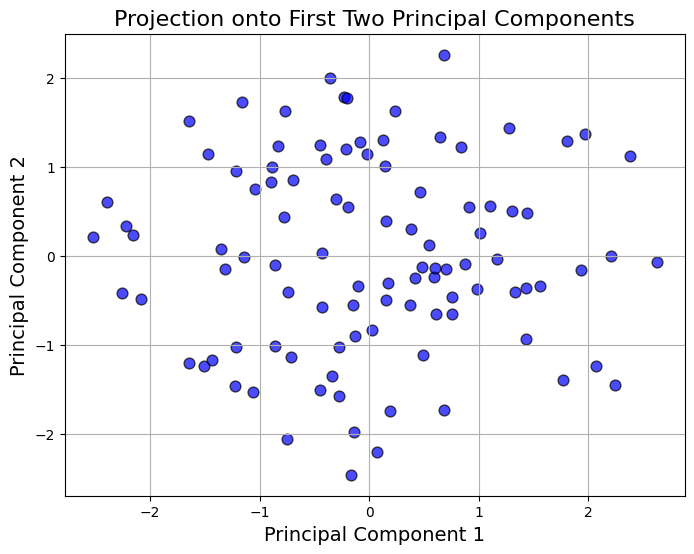

In [12]:
#Q34. Train a PCA model and visualize the data projection onto the first two principal components4

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generate synthetic data (or use your own dataset)
np.random.seed(0)
X = np.random.rand(100, 5)  # 100 samples, 5 features

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA and project to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the projection
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k', s=60, alpha=0.7)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('Projection onto First Two Principal Components', fontsize=16)
plt.grid(True)
plt.show()


In [13]:
#Q35.Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import time

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KD Tree
knn_kd = KNeighborsClassifier(algorithm='kd_tree')
start_kd = time.time()
knn_kd.fit(X_train_scaled, y_train)
y_pred_kd = knn_kd.predict(X_test_scaled)
kd_time = time.time() - start_kd
kd_acc = accuracy_score(y_test, y_pred_kd)

# Ball Tree
knn_ball = KNeighborsClassifier(algorithm='ball_tree')
start_ball = time.time()
knn_ball.fit(X_train_scaled, y_train)
y_pred_ball = knn_ball.predict(X_test_scaled)
ball_time = time.time() - start_ball
ball_acc = accuracy_score(y_test, y_pred_ball)

print(f"KD Tree accuracy: {kd_acc:.2f}, Time: {kd_time:.4f} sec")
print(f"Ball Tree accuracy: {ball_acc:.2f}, Time: {ball_time:.4f} sec")


KD Tree accuracy: 1.00, Time: 0.0083 sec
Ball Tree accuracy: 1.00, Time: 0.0100 sec


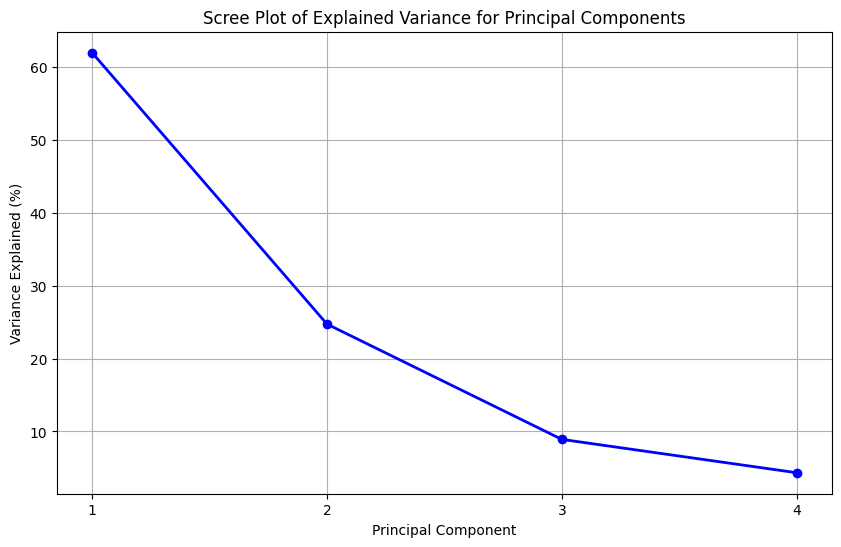

In [16]:
#Q36.Train a PCA model on a high-dimensional dataset and visualize the Scree plot

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load your high-dimensional dataset (example: USArrests dataset)
url = "https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/USArrests.csv"
data = pd.read_csv(url)
df = data.iloc[:, 1:5]  # select numerical columns for PCA

# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Train PCA model
pca = PCA()
pca.fit(scaled_df)

# Explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(
    np.arange(1, len(explained_variance) + 1),
    explained_variance * 100,
    marker='o',
    linewidth=2,
    color='blue'
)
plt.title('Scree Plot of Explained Variance for Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.xticks(np.arange(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()


In [17]:
#Q37. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score4

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load a sample dataset (Iris)
iris = load_iris()
X, y = iris.data, iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate using precision, recall, and F1-score
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



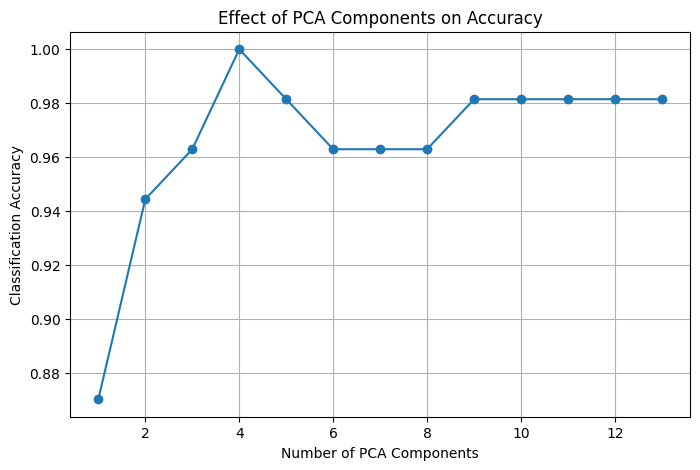

In [19]:
#Q38.Train a PCA model and analyze the effect of different numbers of components on accuracy

import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Analyze accuracy for different numbers of PCA components
n_features = X.shape[1]
accuracies = []

for n in range(1, n_features + 1):
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_features + 1), accuracies, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Classification Accuracy')
plt.title('Effect of PCA Components on Accuracy')
plt.grid(True)
plt.show()


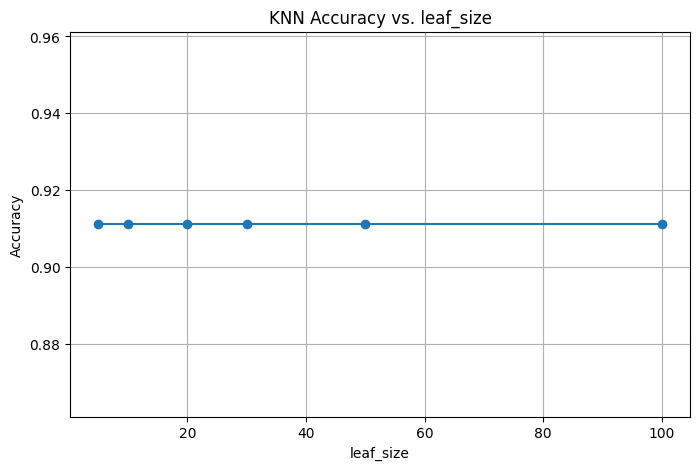

In [20]:
#Q39.Train a KNN Classifier with different leaf_size values and compare accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Test different leaf_size values
leaf_sizes = [5, 10, 20, 30, 50, 100]
accuracies = []

for leaf in leaf_sizes:
    knn = KNeighborsClassifier(n_neighbors=5, leaf_size=leaf)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(leaf_sizes, accuracies, marker='o')
plt.xlabel('leaf_size')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. leaf_size')
plt.grid(True)
plt.show()


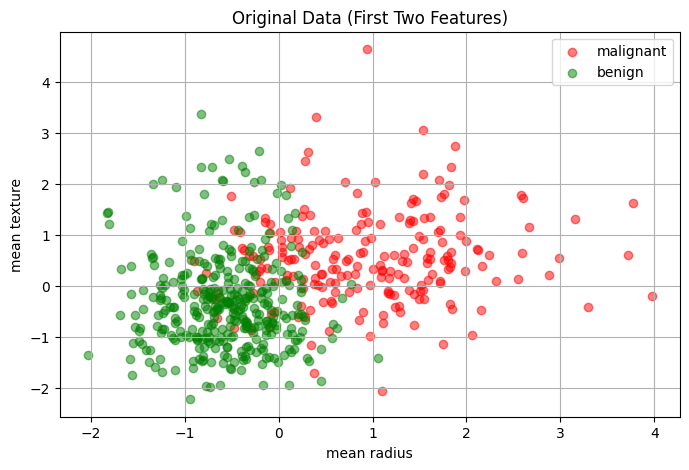

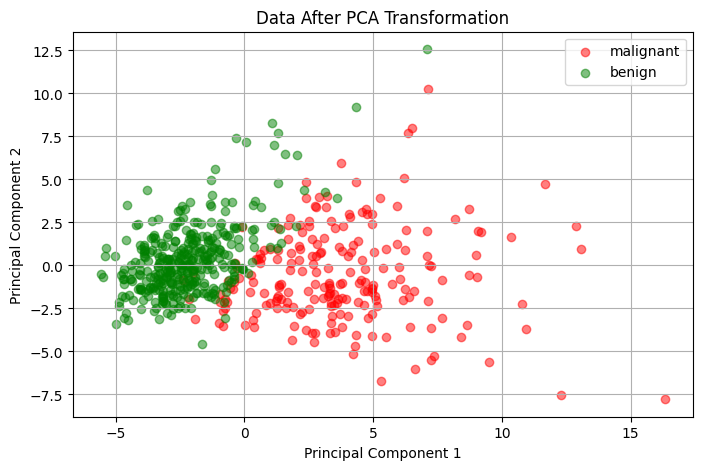

In [21]:
#Q40.Train a PCA model and visualize how data points are transformed before and after PCA

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
target_names = data.target_names

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize original data (using first two features for 2D plot)
plt.figure(figsize=(8, 5))
for label, color in zip(np.unique(y), ['r', 'g']):
    plt.scatter(X_scaled[y == label, 0], X_scaled[y == label, 1],
                label=target_names[label], alpha=0.5, c=color)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('Original Data (First Two Features)')
plt.legend()
plt.grid(True)
plt.show()

# Apply PCA and reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize PCA-transformed data
plt.figure(figsize=(8, 5))
for label, color in zip(np.unique(y), ['r', 'g']):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1],
                label=target_names[label], alpha=0.5, c=color)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data After PCA Transformation')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
#Q41.Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=wine.target_names))


              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        15
     class_1       0.75      0.67      0.71        18
     class_2       0.57      0.67      0.62        12

    accuracy                           0.78        45
   macro avg       0.77      0.78      0.77        45
weighted avg       0.79      0.78      0.78        45



Metric: euclidean, Mean Squared Error: 0.4295
Metric: manhattan, Mean Squared Error: 0.3813
Metric: chebyshev, Mean Squared Error: 0.4681
Metric: minkowski, Mean Squared Error: 0.4295


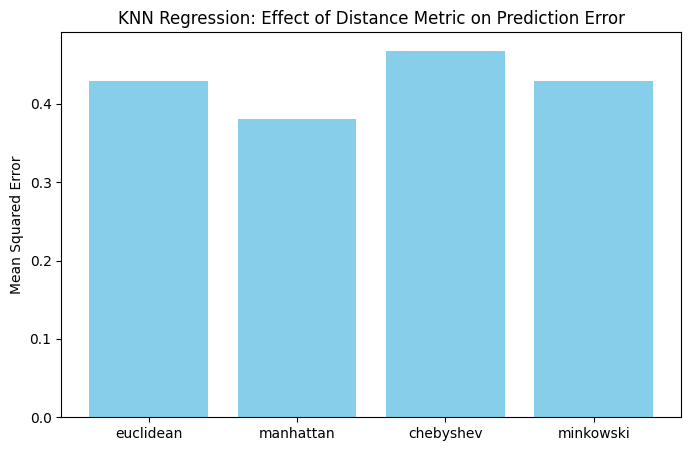

In [23]:
#Q42.Train a KNN Regressor and analyze the effect of different distance metrics on prediction error

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Try different distance metrics
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
errors = []

for metric in metrics:
    knn = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)
    print(f"Metric: {metric}, Mean Squared Error: {mse:.4f}")

# Visualize the results
plt.figure(figsize=(8,5))
plt.bar(metrics, errors, color='skyblue')
plt.ylabel('Mean Squared Error')
plt.title('KNN Regression: Effect of Distance Metric on Prediction Error')
plt.show()


KNN ROC-AUC Score: 0.983


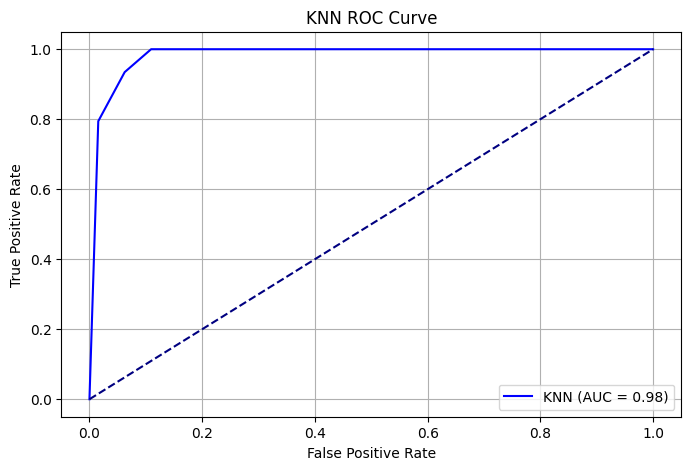

In [24]:
#Q43. Train a KNN Classifier and evaluate using ROC-AUC score

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load a binary classification dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict probabilities for the positive class
y_proba = knn.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"KNN ROC-AUC Score: {roc_auc:.3f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, color='blue', label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


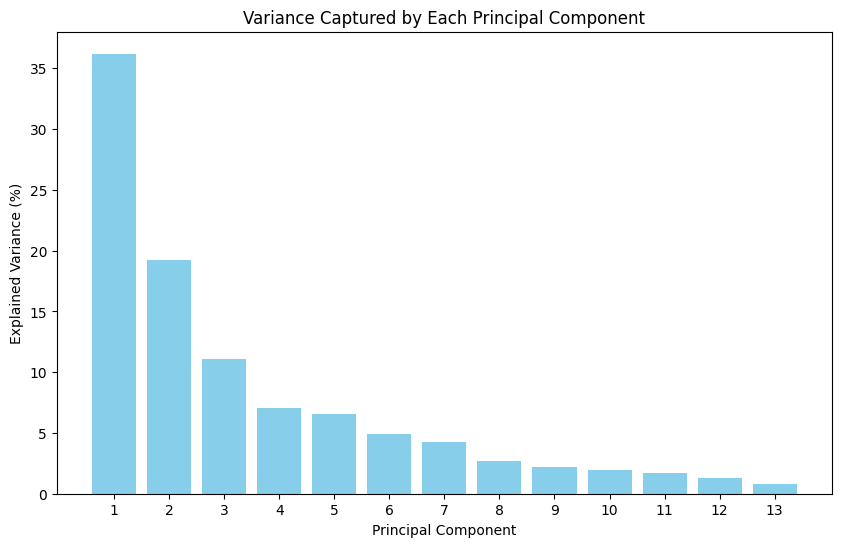

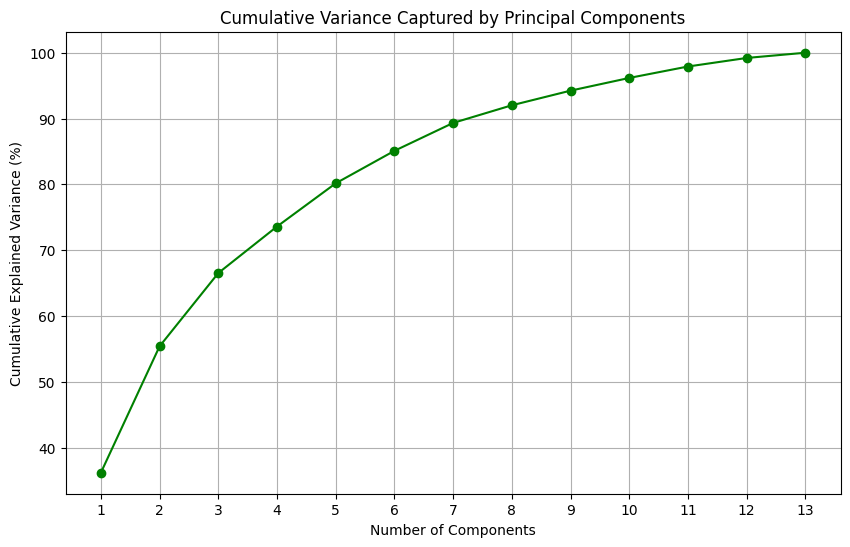

In [25]:
#Q44.Train a PCA model and visualize the variance captured by each principal component

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load and standardize data
data = load_wine()
X = data.data
X_std = StandardScaler().fit_transform(X)

# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Explained variance ratio
explained_var = pca.explained_variance_ratio_ * 100  # as percentage

# Bar plot for explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_var) + 1), explained_var, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Variance Captured by Each Principal Component')
plt.xticks(range(1, len(explained_var) + 1))
plt.show()

# Cumulative explained variance plot
cumulative_var = np.cumsum(pca.explained_variance_ratio_) * 100
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='o', color='green')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Variance Captured by Principal Components')
plt.xticks(range(1, len(cumulative_var) + 1))
plt.grid(True)
plt.show()


In [26]:
#Q45.Train a KNN Classifier and perform feature selection before training

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load data
X, y = load_wine(return_X_y=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Feature selection: select top 8 features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=8)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_selected, y_train)

# Evaluate
y_pred = knn.predict(X_test_selected)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.83      0.86        18
           1       0.65      0.81      0.72        21
           2       0.36      0.27      0.31        15

    accuracy                           0.67        54
   macro avg       0.63      0.64      0.63        54
weighted avg       0.65      0.67      0.65        54



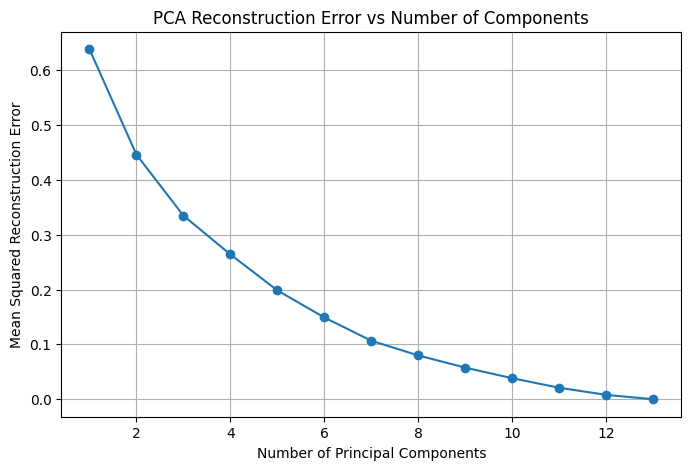

In [27]:
#Q46. Train a PCA model and visualize the data reconstruction error after reducing dimensions4

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load and standardize data
data = load_wine()
X = data.data
X_std = StandardScaler().fit_transform(X)

# Range of components to test
components_range = range(1, X.shape[1] + 1)
reconstruction_errors = []

for n_components in components_range:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_std)
    X_reconstructed = pca.inverse_transform(X_pca)
    # Compute mean squared reconstruction error
    error = np.mean((X_std - X_reconstructed) ** 2)
    reconstruction_errors.append(error)

# Plot reconstruction error vs number of components
plt.figure(figsize=(8, 5))
plt.plot(components_range, reconstruction_errors, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Reconstruction Error')
plt.title('PCA Reconstruction Error vs Number of Components')
plt.grid(True)
plt.show()


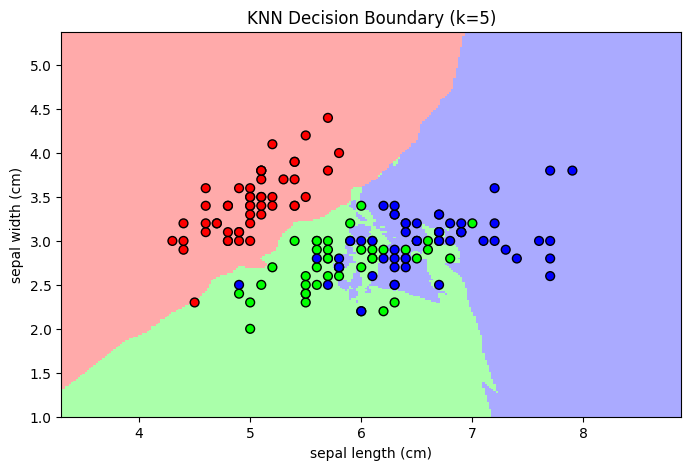

In [31]:
#Q47.Train a KNN Classifier and visualize the decision boundary
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# Load dataset and use first two features for 2D visualization
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

n_neighbors = 5
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Train KNN classifier
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)

# Create a mesh grid over the feature space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each point in the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and training points
plt.figure(figsize=(8, 5))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=40)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f"KNN Decision Boundary (k={n_neighbors})")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()



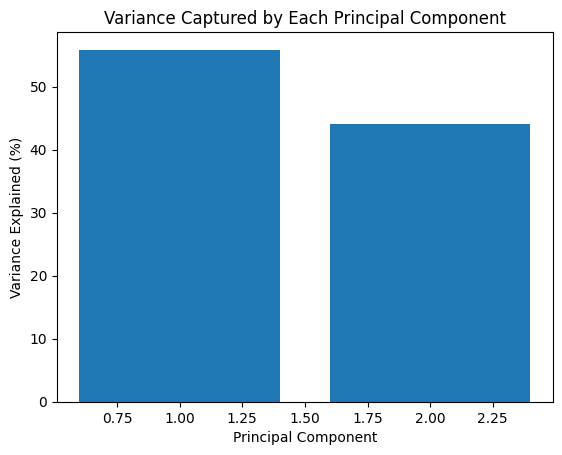

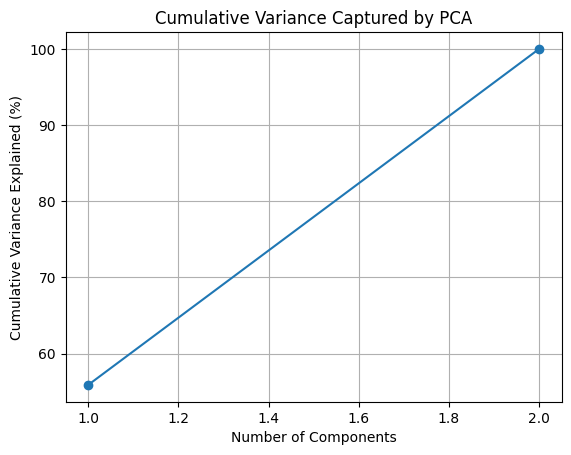

In [29]:
#Q48.Train a PCA model and analyze the effect of different numbers of components on data variance.

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(X)  # X is your standardized data
explained_var = pca.explained_variance_ratio_

plt.bar(range(1, len(explained_var)+1), explained_var*100)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.title('Variance Captured by Each Principal Component')
plt.show()

plt.plot(range(1, len(explained_var)+1), np.cumsum(explained_var)*100, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.title('Cumulative Variance Captured by PCA')
plt.grid(True)
plt.show()
